In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('./Corona_NLP_train.csv',encoding='latin-1')

## Analysis of the dataset

In [3]:
# Getting info about the dataset
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [4]:
get_info_dataframe(df)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None 

DATAFRAME MISSING INFO - 

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64 

DATAFRAME SHAPE INFO - 

(41157, 6)


Total Columns : 6
Total Numerical Columns : 2
Total Categorical Columns : 4


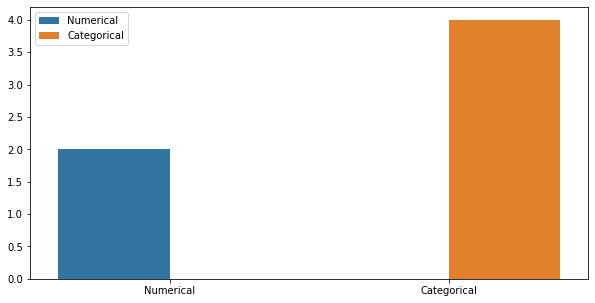

In [5]:
def get_col_type_representation(df):
    num_cols = df._get_numeric_data().columns
    cat_cols = set(df.columns)-set(num_cols)
    cat_list = ['Numerical','Categorical']
    count_list = [len(num_cols),len(cat_cols)]
    plt.figure(figsize=(10,5))
    print("Total Columns : {total}".format(total=len(df.columns)))
    print("Total Numerical Columns : {numerical}".format(numerical=len(num_cols)))
    print("Total Categorical Columns : {categorical}".format(categorical=len(cat_cols)))
    sns.barplot(x=cat_list,y=count_list,hue = cat_list)
get_col_type_representation(df)

Missing % value of Location is : 100.00 


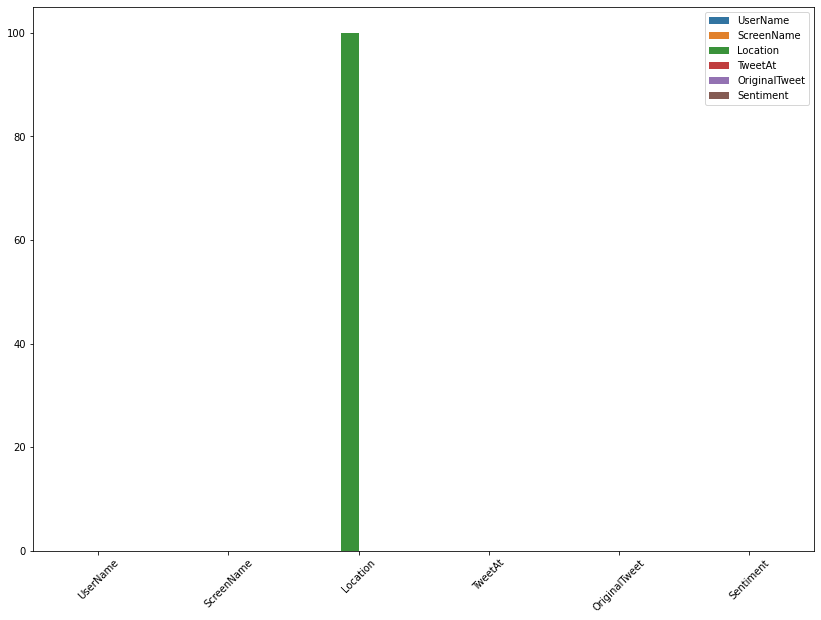

In [6]:
# Fucntion to get the percentage of missing values
def get_percentage_of_missing_values(dataframe):
    col_list = dataframe.columns
    my_dict = {}
    total_null = 0
    for i in range(len(col_list)):
        total_null += dataframe[col_list[i]].isnull().sum()
    if(total_null == 0):
        return "No Missing Values Found"
    for i in range(len(col_list)):
        curr_null = dataframe[col_list[i]].isnull().sum()
        my_dict[col_list[i]] = (curr_null/total_null) * 100
    for i,(k,v) in enumerate(my_dict.items()):
        if(v > 0):
            print("Missing % value of {col_name} is : {val:.2f} ".format(col_name=k,val=v))
    plt.figure(figsize=(14,10))
    plt.xticks(rotation=45)
    sns.barplot(x = list(my_dict.keys()),y = list(my_dict.values()),hue = list(my_dict.keys()))

get_percentage_of_missing_values(df)

In [7]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [8]:
Neutral_count = 0
Positive_count = 0
Extremely_Negative_count = 0
Negative_count  = 0
Extremely_Positive_count = 0
sentiment = list(df['Sentiment'])

In [9]:
for i in range(len(sentiment)):
    if sentiment[i] == 'Neutral':
        Neutral_count+=1
    elif sentiment[i] == 'Positive':
        Positive_count+=1
    elif sentiment[i] == 'Extremely Negative':
        Extremely_Negative_count+=1
    elif sentiment[i] == 'Negative':
        Negative_count+=1
    elif sentiment[i] == 'Extremely Positive':
        Extremely_Positive_count+=1

Text(0, 0.5, 'Sentiment Type Count')

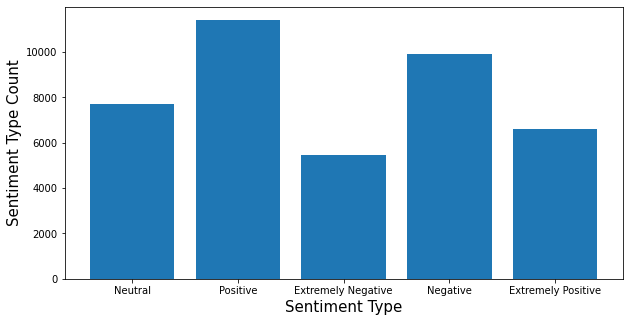

In [10]:
fig = plt.figure(figsize=(10,5))
sentiment_type = ['Neutral', 'Positive', 'Extremely Negative','Negative','Extremely Positive']
sentiment_count = [Neutral_count,Positive_count,Extremely_Negative_count,Negative_count,Extremely_Positive_count]
plt.bar(sentiment_type,sentiment_count)
plt.xlabel('Sentiment Type',size=15)
plt.ylabel('Sentiment Type Count',size=15)

In [11]:
# Selecting the required columns
data = pd.DataFrame(data = df[['OriginalTweet','Sentiment']])

In [12]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Data Preprocessing

In [13]:
data['OriginalTweet'] = data['OriginalTweet'].str.lower()

In [14]:
data.head()

,OriginalTweet,Sentiment
0,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia: woolworths to give elde...,Positive
3,my food stock is not the only one which is emp...,Positive
4,"me, ready to go at supermarket during the #cov...",Extremely Negative


In [15]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [16]:
STOPWORDS = set(stopwordlist)
# Function for removing stopwords from the dataset
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
data['OriginalTweet'].head()

0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock not one empty... please, don't pani...
4    me, ready go supermarket #covid19 outbreak. no...
Name: OriginalTweet, dtype: object

In [17]:
STOPWORDS = set(stopwordlist)
# Function for removing stopwords from the dataset
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
data['OriginalTweet'].head()

0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock not one empty... please, don't pani...
4    me, ready go supermarket #covid19 outbreak. no...
Name: OriginalTweet, dtype: object

In [18]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
# Function for removing punctuations from the dataset
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['OriginalTweet']= data['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

In [19]:
# Function for cleaning Repeating Characters from the dataset
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))

In [20]:
# Function for cleaning URLS from the dataset
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

In [21]:
# Function for cleaning numbers from the dataset
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

In [22]:
data.head()

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv httpstcoifzfanpa h...,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock not one empty please dont panic eno...,Positive
4,me ready go supermarket covi outbreak not im p...,Extremely Negative


In [23]:
data.to_csv('Corona_NLP_clean.csv',index=False)

## Loading the cleaned dataset in PySpark

In [24]:
from pyspark import SparkContext

In [25]:
sc = SparkContext(master="local[2]")

In [26]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [27]:
from pyspark.sql import SparkSession

In [28]:
# Creating the session
spark = SparkSession.builder.appName("TextClassificationwithPySpark").getOrCreate()

In [29]:
# Reading the cleaned NLP CSV file
df = spark.read.csv('./Corona_NLP_clean.csv',header=True,inferSchema=True)

In [30]:
df.show()

+--------------------+------------------+
|       OriginalTweet|         Sentiment|
+--------------------+------------------+
|menyrbie philgaha...|           Neutral|
|advice talk neigh...|          Positive|
|coronavirus austr...|          Positive|
|food stock not on...|          Positive|
|me ready go super...|Extremely Negative|
|news regionâs fi...|          Positive|
|cashier grocery s...|          Positive|
|supermarket today...|           Neutral|
|due covi retail s...|          Positive|
|corona prevention...|          Negative|
|month hasnt crowd...|           Neutral|
|due covi situatio...|Extremely Positive|
|horningsea caring...|Extremely Positive|
|me dont need stoc...|          Positive|
|adara releases co...|          Positive|
|lines grocery sto...|          Positive|
|                 ...|           Neutral|
|eyeonthearcticmar...|           Neutral|
|amazon glitch sty...|Extremely Positive|
|arent struggling ...|          Positive|
+--------------------+------------

In [31]:
df.columns

['OriginalTweet', 'Sentiment']

In [32]:
# Selecting Custom Columns
df.select('OriginalTweet','Sentiment').show()

+--------------------+------------------+
|       OriginalTweet|         Sentiment|
+--------------------+------------------+
|menyrbie philgaha...|           Neutral|
|advice talk neigh...|          Positive|
|coronavirus austr...|          Positive|
|food stock not on...|          Positive|
|me ready go super...|Extremely Negative|
|news regionâs fi...|          Positive|
|cashier grocery s...|          Positive|
|supermarket today...|           Neutral|
|due covi retail s...|          Positive|
|corona prevention...|          Negative|
|month hasnt crowd...|           Neutral|
|due covi situatio...|Extremely Positive|
|horningsea caring...|Extremely Positive|
|me dont need stoc...|          Positive|
|adara releases co...|          Positive|
|lines grocery sto...|          Positive|
|                 ...|           Neutral|
|eyeonthearcticmar...|           Neutral|
|amazon glitch sty...|Extremely Positive|
|arent struggling ...|          Positive|
+--------------------+------------

In [33]:
df.show(5)

+--------------------+------------------+
|       OriginalTweet|         Sentiment|
+--------------------+------------------+
|menyrbie philgaha...|           Neutral|
|advice talk neigh...|          Positive|
|coronavirus austr...|          Positive|
|food stock not on...|          Positive|
|me ready go super...|Extremely Negative|
+--------------------+------------------+
only showing top 5 rows



In [34]:
#Value Counts
df.groupBy('Sentiment').count().show()

+------------------+-----+
|         Sentiment|count|
+------------------+-----+
|Extremely Negative| 5481|
|           Neutral| 7713|
|          Positive|11422|
|          Negative| 9917|
|Extremely Positive| 6624|
+------------------+-----+



In [35]:
# Value Counts via pandas
df.toPandas()['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [36]:
# Checking For Missing Values
df.toPandas()['Sentiment'].isnull().sum()

0

In [37]:
df.toPandas()['OriginalTweet'].isnull().sum()

1

In [38]:
# Drop Missing Values
df = df.dropna(subset=('Sentiment'))
df = df.dropna(subset=('OriginalTweet'))

In [39]:
# Loading Our Machine Learning Package
import pyspark.ml.feature

In [40]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

## Creating Pipeline with PySpark

In [41]:
# Creating the necessary Stages For the Pipeline
tokenizer = Tokenizer(inputCol='OriginalTweet',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

In [42]:
# LabelEncoding/LabelIndexing
labelEncoder = StringIndexer(inputCol='Sentiment',outputCol='label').fit(df)

In [43]:
labelEncoder.transform(df).show(5)

+--------------------+------------------+-----+
|       OriginalTweet|         Sentiment|label|
+--------------------+------------------+-----+
|menyrbie philgaha...|           Neutral|  2.0|
|advice talk neigh...|          Positive|  0.0|
|coronavirus austr...|          Positive|  0.0|
|food stock not on...|          Positive|  0.0|
|me ready go super...|Extremely Negative|  4.0|
+--------------------+------------------+-----+
only showing top 5 rows



In [44]:
labelEncoder.labels

['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

In [45]:
df = labelEncoder.transform(df)

In [46]:
df.show(5)

+--------------------+------------------+-----+
|       OriginalTweet|         Sentiment|label|
+--------------------+------------------+-----+
|menyrbie philgaha...|           Neutral|  2.0|
|advice talk neigh...|          Positive|  0.0|
|coronavirus austr...|          Positive|  0.0|
|food stock not on...|          Positive|  0.0|
|me ready go super...|Extremely Negative|  4.0|
+--------------------+------------------+-----+
only showing top 5 rows



In [47]:
# Splitting Dataset
(trainDF,testDF) = df.randomSplit((0.8,0.2),seed=101)

In [48]:
trainDF.show()

+--------------------+------------------+-----+
|       OriginalTweet|         Sentiment|label|
+--------------------+------------------+-----+
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|          Negative|  1.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|                 ...|           Neutral|  2.0|
|            youtu...|           Neutral|  2.0|
|           httpst...|           Neutral|  2.0|
|         httpstco...|           Neutral|  2.0|
|      httpstcovac...|           Neutral

In [49]:
from pyspark.ml.classification import LogisticRegression,RandomForestClassifier,DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [50]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

## Applying Our Machine Learning Algorithms

In [51]:
# Our first classification algorithm Decision Tree

In [52]:
dt_classifier = RandomForestClassifier(featuresCol='vectorizedFeatures',labelCol='label')

In [53]:
pipeline_dt =  Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,dt_classifier])

In [54]:
pipeline_dt.stages

Param(parent='Pipeline_f939d25fada0', name='stages', doc='a list of pipeline stages')

In [55]:
dt_model = pipeline_dt.fit(trainDF)

In [56]:
predictions_dt = dt_model.transform(testDF)

In [57]:
accuracy_dt = evaluator.evaluate(predictions_dt)
round(accuracy_dt * 100,3)

28.059

In [58]:
# Our second classification algorithm Random Forest

In [59]:
rf_classifier = RandomForestClassifier(featuresCol='vectorizedFeatures',labelCol='label')

In [60]:
pipeline_rf =  Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,rf_classifier])

In [61]:
rf_model = pipeline_rf.fit(trainDF)

In [62]:
predictions_rf = rf_model.transform(testDF)

In [63]:
accuracy_rf = evaluator.evaluate(predictions_rf)
round(accuracy_rf * 100,3)

27.866

In [64]:
# We can clearly see that we didn't get the any improvement in accuracy.
# Now trying with another classification algorithm Logistic Regression.

In [65]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

In [66]:
pipeline_lr = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [67]:
pipeline_lr.stages

Param(parent='Pipeline_74693d340642', name='stages', doc='a list of pipeline stages')

In [68]:
lr_model = pipeline_lr.fit(trainDF)

In [69]:
predictions_lr = lr_model.transform(testDF)

In [70]:
predictions_lr.show(1)

+--------------------+---------+-----+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+----------+
|       OriginalTweet|Sentiment|label|            mytokens|     filtered_tokens|       rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+---------+-----+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+----------+
|                 ...|  Neutral|  2.0|[, , , , , , , , ...|[, , , , , , , , ...|(71454,[0],[39.0])|(71454,[0],[46.82...|[-13.385301424507...|[3.13242801058619...|       2.0|
+--------------------+---------+-----+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+----------+
only showing top 1 row



In [71]:
accuracy_lr = evaluator.evaluate(predictions_lr)
round(accuracy_lr * 100,3)

42.686

In [72]:
# As you can see now our accuracy has improved a lot,almost by a difference of 15. 